# Laboration deep learning

## 0. EDA och filhantering

### a)

### b)

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import os

current_path = Path().absolute()
print(f"{current_path = }")

current_path = WindowsPath('y:/Skola/OOP/Skolarbete/AI-Erik-Johansson-OPA23/lab2')


In [ ]:
!ls ..

In [2]:
import matplotlib.pyplot as plt

data_path = current_path / "original_data" / "train" / "train"

image_paths = [f for f in os.listdir(data_path)]

# https://stackoverflow.com/questions/49280966/pulling-random-files-out-of-a-folder-for-sampling

images_random = [(plt.imread(data_path / i), i) for i in (np.random.choice(image_paths, 10))]

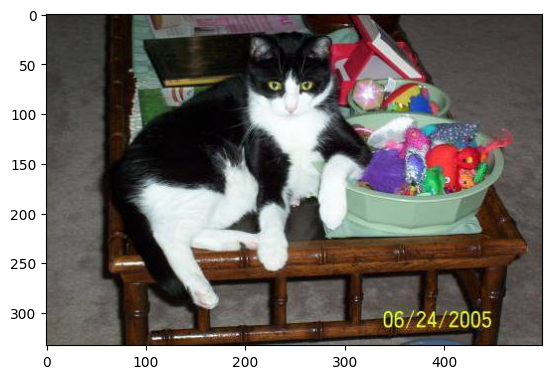

In [3]:
plt.imshow(images_random[0][0])

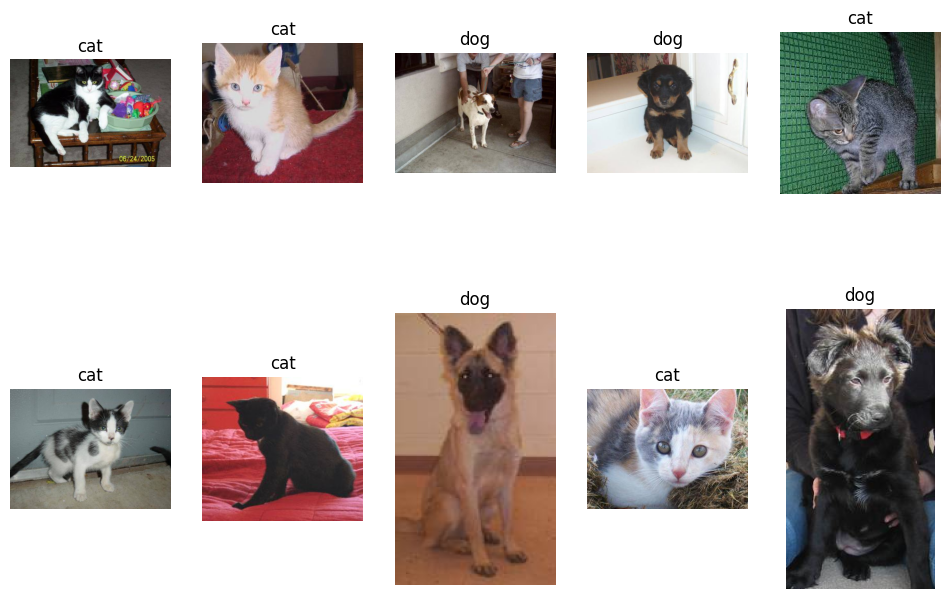

In [4]:
import matplotlib.pyplot as plt

labels = ["dog", "cat"]

fig, axes = plt.subplots(2,5, figsize=(12,8))

for ax, image in zip(axes.flatten(), images_random):
    ax.imshow(image[0])
    # https://stackoverflow.com/questions/47684802/to-check-if-filename-has-substring-of-a-word-in-a-list
    for label in labels:
        if label in image[1]:
            ax.set_title(f"{label}")
    ax.axis("off")

### c)

In [5]:
for size in ("small", "tiny"):
    newdir = current_path / f"experiment_{size}_data"
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    for split in ("test", "train", "val"):
        splitdir = newdir / split
        if not os.path.exists(splitdir):
            os.makedirs(splitdir)


### d)

In [5]:
cat_paths = [str(path) for path in data_path.glob("*.jpg")][:12500]
dog_paths = [str(path) for path in data_path.glob("*.jpg")][12500:]
cat_paths[12499], dog_paths[12499]

('y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\cat.9999.jpg',
 'y:\\Skola\\OOP\\Skolarbete\\AI-Erik-Johansson-OPA23\\lab2\\original_data\\train\\train\\dog.9999.jpg')

In [6]:
cat_small = np.random.choice(cat_paths, 1250, replace=False)
dog_small = np.random.choice(dog_paths, 1250, replace=False)
len(cat_small), len(dog_small)

(1250, 1250)

In [7]:
len(cat_small)

1250

In [8]:
from itertools import islice
# https://www.geeksforgeeks.org/python-split-list-in-uneven-groups/
test_sizes = [250, 800, 200]

temp = iter(cat_small)
cat_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(cat_split[1])

800

In [9]:
temp = iter(dog_small)
dog_split = [list(islice(temp, 0, ele)) for ele in test_sizes]

len(dog_split[2])

200

In [10]:
for cat in cat_split:
    print(len(cat))

250
800
200


In [ ]:
import shutil
# https://stackoverflow.com/questions/123198/how-to-copy-files

dirs = ("test", "train", "val")
#for dir, splits in zip(dirs, cat_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)

#for dir, splits in zip(dirs, dog_split):
    #for path in splits:
        #shutil.copy2(path, current_path / "experiment_small_data" / dir)
    

### e)

In [3]:
data_path = current_path / "experiment_small_data" / "test"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "test-data"
test_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.seed(42)
np.random.shuffle(test_paths)
len(test_paths)

500

In [4]:
data_path = current_path / "experiment_small_data" / "train"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "train-data"
train_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(train_paths)
len(train_paths)

1600

In [5]:
data_path = current_path / "experiment_small_data" / "val"
if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    data_path = Path().absolute().parent / "input" / "val-data"
val_paths = [str(path) for path in data_path.glob("*.jpg")]
np.random.shuffle(val_paths)
len(val_paths)

400

In [6]:
len(train_paths)

1600

In [7]:
y_test = np.array([int("dog" in path) for path in test_paths])
y_train = np.array([int("dog" in path) for path in train_paths])
y_val = np.array([int("dog" in path) for path in val_paths])
len(y_test), len(y_train), len(y_val)

(500, 1600, 400)

In [8]:
image_test = [plt.imread(path) for path in test_paths[:10]]
image_labels = y_test[:10]
len(image_test), len(image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

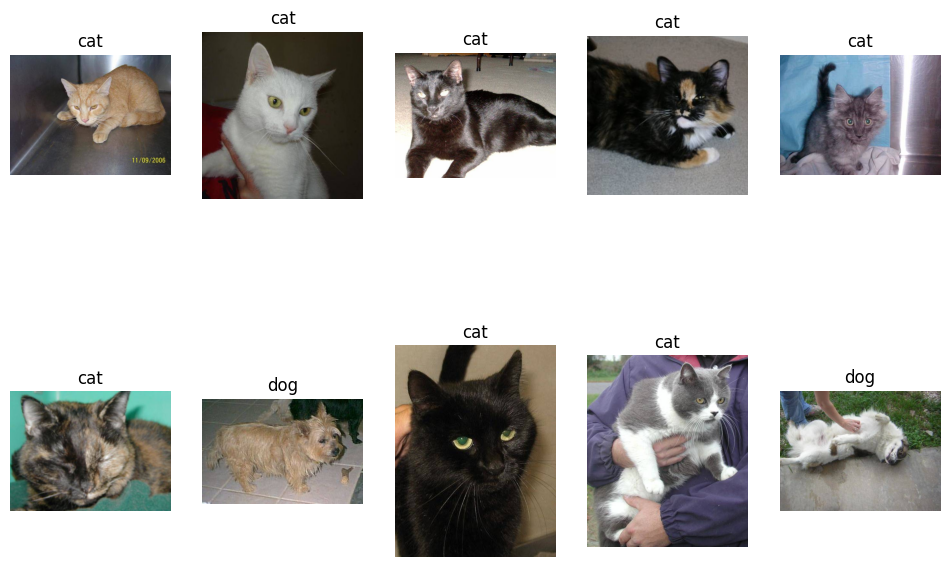

In [9]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(image_test[i])
    ax.axis("off")
    ax.set_title(labels[image_labels[i]])

fig.tight_layout

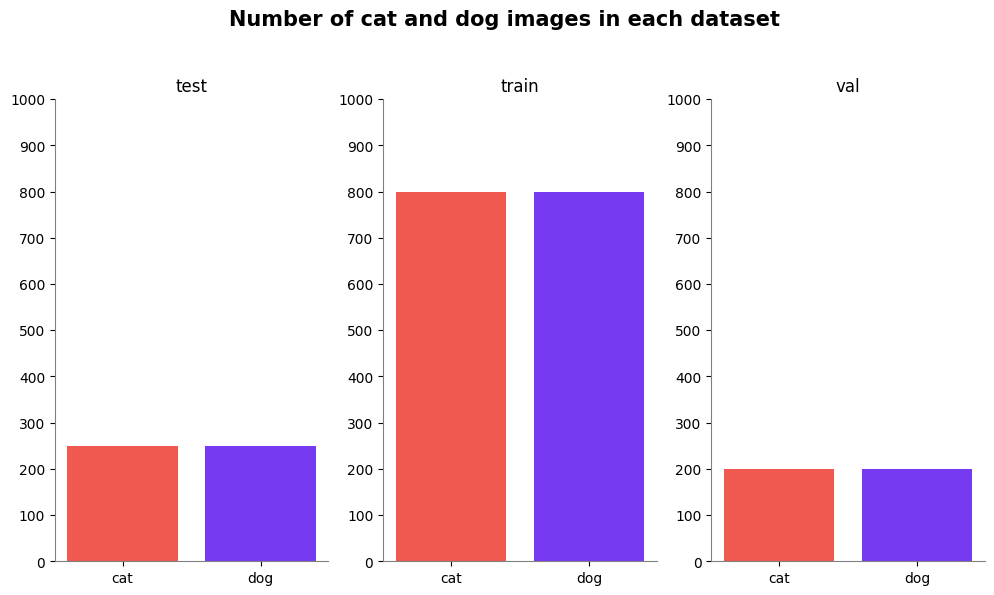

In [10]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for dir, ax in zip(dirs, axes):
    x = ["cat", "dog"]
    ax.set_title(dir)
    if dir == "test":
        y = [np.count_nonzero(y_test == i) for i in range(2)]
    elif dir == "train":
        y = [np.count_nonzero(y_train == i) for i in range(2)]
    elif dir == "val":
        y = [np.count_nonzero(y_val == i) for i in range(2)]
    ax.bar(x, y, color=["#F05950", "#763AF0"])
    ax.set_yticks(range(0, 1001, 100))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")

    fig.suptitle(
        "Number of cat and dog images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

In [11]:
# Check that order of cats and dogs seem randomized
y_train[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0])

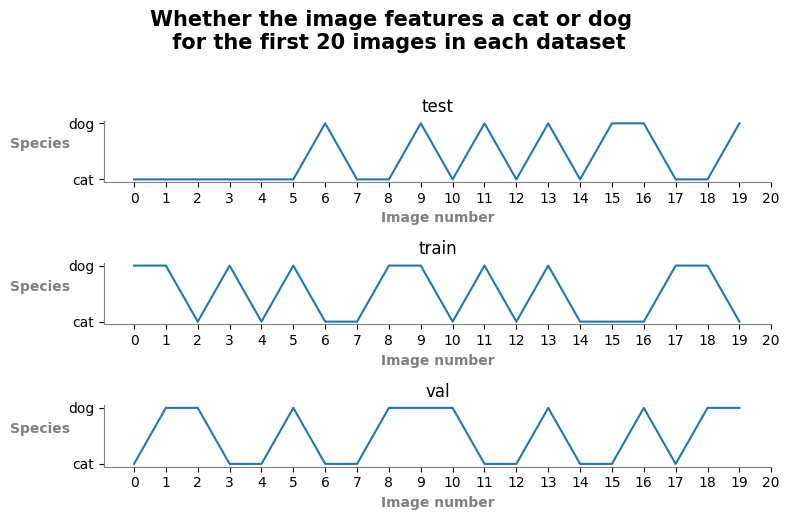

In [12]:
dirs = ("test", "train", "val")

fig, axes = plt.subplots(3, 1, figsize=(8, 5))
for dir, ax in zip(dirs, axes):
    x = range(20)
    ax.set_title(dir)
    if dir == "test":
        y = y_test[:20]
    elif dir == "train":
        y = y_train[:20]
    elif dir == "val":
        y = y_val[:20]
    ax.plot(x, y)
    ax.set_yticks(ticks=range(0, 2), labels=("cat", "dog"))
    ax.set_xticks(ticks=range(0, 21, 1))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color("GRAY")
    ax.set_xlabel("Image number", color="GRAY", fontweight="bold")
    ax.set_ylabel("Species", rotation=0, labelpad=20, color="GRAY", fontweight="bold")

    fig.suptitle(
        "Whether the image features a cat or dog \n for the first 20 images in each dataset",
        y=1.03,
        fontweight="bold",
        fontsize=15,
    )

fig.tight_layout()

## 1. Bildbehandling

### a)

In [13]:
train_images = [plt.imread(path) for path in train_paths]
len(train_images)

1600

In [14]:
heights = [image.shape[0] for image in train_images]
widths = [image.shape[1] for image in train_images]
heights[:5], widths[:5]

([500, 488, 375, 149, 210], [347, 500, 499, 200, 279])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


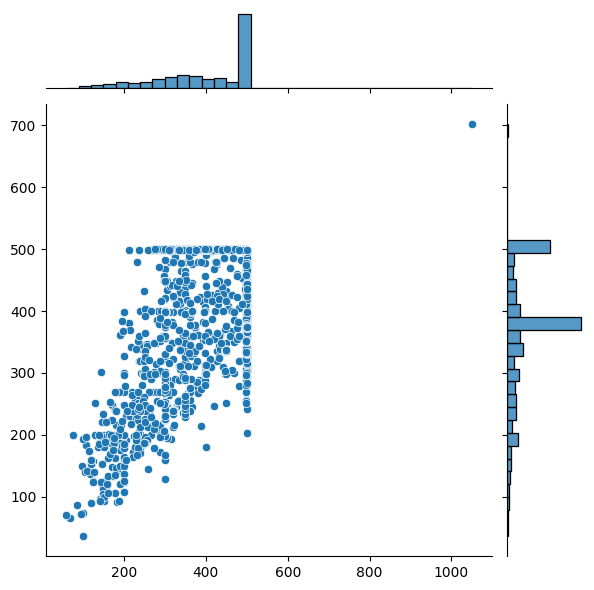

In [15]:
import seaborn as sns 

sns.jointplot(x=widths, y=heights)

### b)

Såg snabbt över bilderna och bytte manuellt ut ett par som inte föreställde varken en hund eller katt (dog.8898, dog.4367)

In [16]:
# Check how many images has a height and/or width that's smaller than 100px
res_too_small = []
for idx in range(0, len(heights)) :
    if heights[idx] < 150 or widths[idx] < 150:
        res_too_small.append(idx)

len(res_too_small), res_too_small[:5]

(74, [3, 11, 15, 31, 98])

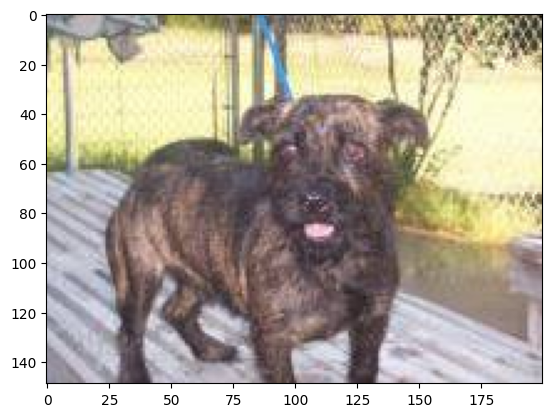

In [18]:
# Example image with subpar resolution
plt.imshow(train_images[res_too_small[0]])

In [19]:
# Check how many images that has a height of 1.75 or more times its width and vice versa
res_bad_ratio = []
for idx in range(0, len(heights)) :
    if heights[idx] > 2*widths[idx] or widths[idx] > 1.5*heights[idx]:
        res_bad_ratio.append(idx)

len(res_bad_ratio), res_bad_ratio[:5]

(97, [31, 46, 63, 107, 123])

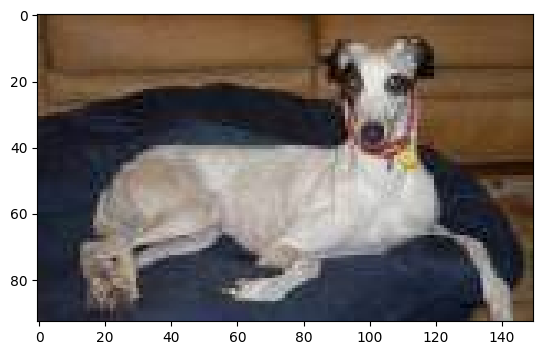

In [20]:
# Example image with subpar aspect ratio
plt.imshow(train_images[res_bad_ratio[0]])

In [21]:
# Check how many of the images are taller, wider or have the same ratio
taller, wider, same = 0, 0, 0
for idx in range(0, len(heights)) :
    if heights[idx] > widths[idx]:
        taller += 1
    elif widths[idx] > heights[idx]:
        wider += 1
    else:
        same +=1

taller, wider, same

(546, 1049, 5)

In [22]:
# Check average height and width
np.average(heights), np.average(widths)

(363.1575, 399.710625)

In [23]:
# Check most common height and width
for w in (heights, widths):
    unique, counts = np.unique(w, return_counts=True)
    print(unique[np.argmax(counts)])

374
499


### Val av bildstorlek
En lämplig bildstorlek skulle kunna vara ca 300x350 eftersom det är runt den storleken de flesta bilderna är och att de generellt är bredare så kan det vara värt att skeva hur de förvrängs mer åt det hållet. Jag tänker att bilder som har mindre upplösning än 150px i någon riktning kan slängas och att bilder som har för stor skillnad i höjd och bredd nog också kan vara värt att göra så med.

In [25]:
def get_desired_paths(dir, min_size, max_ratio):
    data_path = current_path / "experiment_small_data" / dir
    if "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
        data_path = Path().absolute().parent / "input" / f"{dir}-data"
    paths = [str(path) for path in data_path.glob("*.jpg")]
    np.random.seed(42)
    np.random.shuffle(paths)

    images = [plt.imread(path) for path in paths]
    heights = [image.shape[0] for image in images]
    widths = [image.shape[1] for image in images]

    res_too_small = []
    for idx in range(0, len(heights)):
        if heights[idx] < min_size or widths[idx] < min_size:
            res_too_small.append(idx)

    res_bad_ratio = []
    for idx in range(0, len(heights)):
        if (
            heights[idx] > max_ratio * widths[idx]
            or widths[idx] > max_ratio * heights[idx]
        ):
            res_bad_ratio.append(idx)

    subpar_images_idx = res_too_small + list(set(res_bad_ratio) - set(res_too_small))
    subpar_images_paths = [paths[idx] for idx in subpar_images_idx]
    new_paths = list(set(paths) - set(subpar_images_paths))

    y = np.array([int("dog" in path) for path in new_paths])

    return new_paths, y

In [26]:
pruned_test_paths, pruned_y_test = get_desired_paths("test", 150, 1.5)
len(pruned_test_paths), len(pruned_y_test)

(412, 412)

In [27]:

pruned_val_paths, pruned_y_val = get_desired_paths("val", 150, 1.5)
len(pruned_val_paths), len(pruned_y_val)

(344, 344)

In [28]:
pruned_train_paths, pruned_y_train = get_desired_paths("train", 150, 1.5)
len(pruned_train_paths), len(pruned_y_train)

(1379, 1379)

In [29]:
pruned_image_test = [plt.imread(path) for path in pruned_test_paths[:10]]
pruned_image_labels = pruned_y_test[:10]
len(pruned_image_test), len(pruned_image_labels)

(10, 10)

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

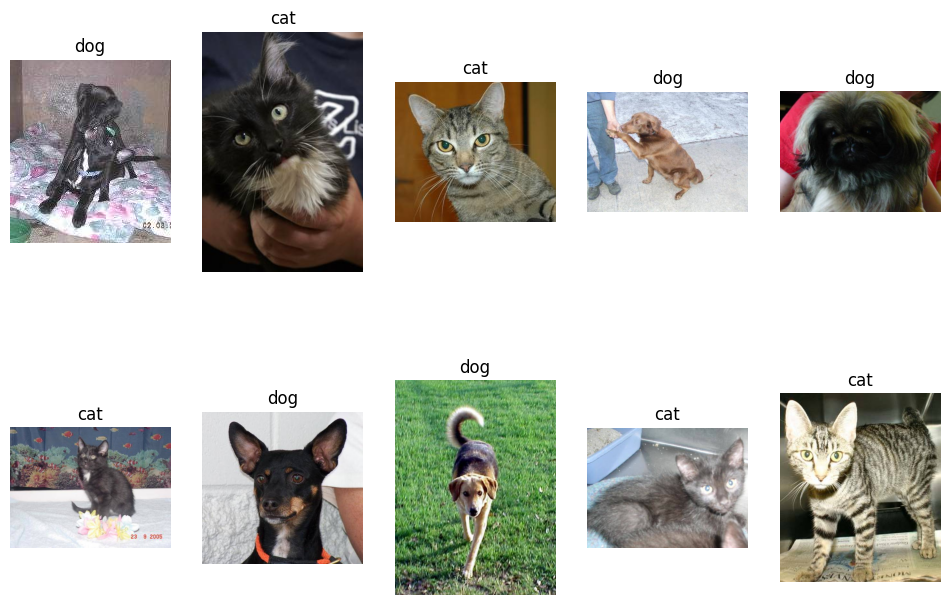

In [30]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(pruned_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

### c)

### Resize images

In [31]:
import cv2

def get_resized_images(data_path, width, height):
    images = [plt.imread(path) for path in data_path]
    resized_images = np.array([cv2.resize(image, (width, height)) for image in images])
    return resized_images

In [32]:
resized_test_images = get_resized_images(pruned_test_paths, 350, 300)
len(resized_test_images)

412

In [33]:
resized_train_images = get_resized_images(pruned_train_paths, 350, 300)
len(resized_train_images)

1379

In [34]:
resized_val_images = get_resized_images(pruned_val_paths, 350, 300)
len(resized_val_images)

344

In [36]:
resized_image_test = resized_test_images[:10]

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

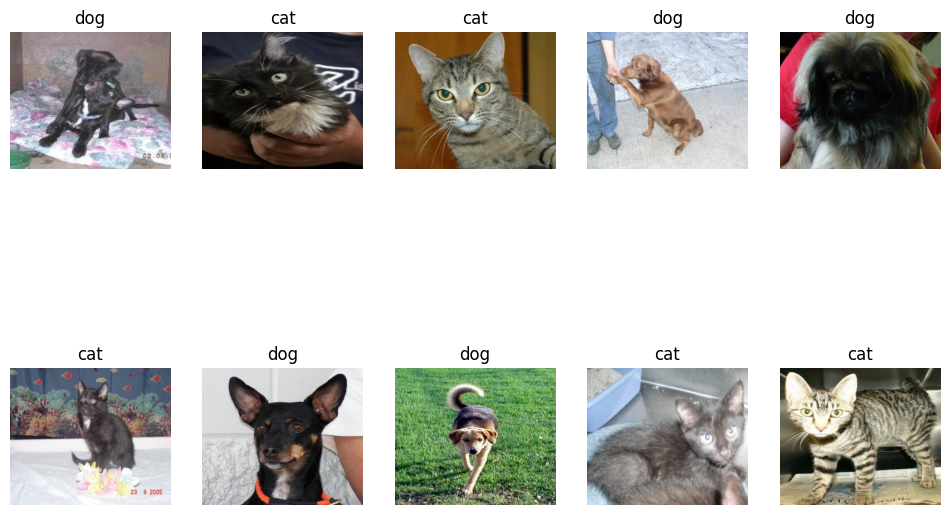

In [37]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(resized_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

In [38]:
resized_image_test = resized_val_images[:10]
pruned_image_labels = pruned_y_val[:10]

<bound method Figure.tight_layout of <Figure size 1200x800 with 10 Axes>>

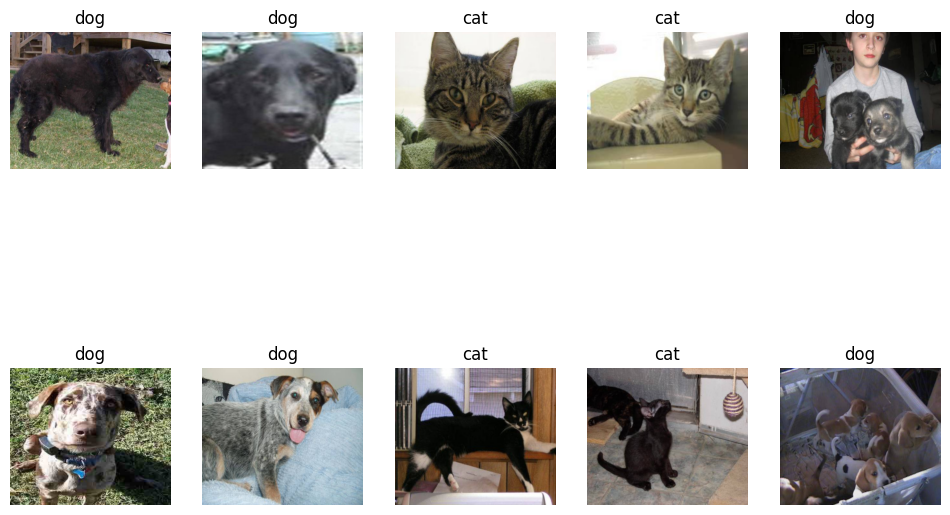

In [39]:
labels = ["cat", "dog"]

fig, axes = plt.subplots(2,5, figsize=(12,8))
for i , ax in enumerate(axes.flatten()):
    ax.imshow(resized_image_test[i])
    ax.axis("off")
    ax.set_title(labels[pruned_image_labels[i]])

fig.tight_layout

In [40]:
resized_test_images[1].shape

(300, 350, 3)

In [41]:
resized_test_images[1].flatten().min(), resized_test_images[1].flatten().max()

(0, 255)

In [42]:
# Scale each x parameter between 0 and 1
x_test = resized_test_images.astype("float32")/255
x_train = resized_train_images.astype("float32")/255
x_val = resized_val_images.astype("float32")/255
x_test.max(), x_test.min(), x_val.max()

(1.0, 0.0, 1.0)

In [43]:
x_train.shape[1:]

(300, 350, 3)

In [44]:
x_train.flatten().min(), x_train.flatten().max()

(0.0, 1.0)

## 2. Träna modeller

### a)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def my_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32,64,128, 128]):

    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, 
            kernel_size=(3, 3),  
            activation="relu", 
            kernel_initializer="he_normal",  
            input_shape=x_train.shape[1:],
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        ) 

  
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(1, activation="sigmoid")
    ) 

    model.compile(
        loss="binary_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

2024-06-05 12:23:24.452279: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 12:23:24.452391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 12:23:24.548248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [46]:
model = my_model()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 348, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 172, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 84, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    20,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,213,377 (80.92 MB)

 Trainable params: 21,213,377 (80.92 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5)

y_train = pruned_y_train
y_val = pruned_y_val

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= (x_val, y_val)
)

Epoch 1/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 15:06 21s/step - acc: 0.5312 - loss: 0.7173

I0000 00:00:1717590264.432299     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717590264.453455     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - acc: 0.5085 - loss: 5.3163

W0000 00:00:1717590275.440565     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717590277.124557     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 414ms/step - acc: 0.5092 - loss: 5.2456 - val_acc: 0.5465 - val_loss: 0.6849
Epoch 2/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - acc: 0.4688 - loss: 0.6963

W0000 00:00:1717590282.346751     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5529 - loss: 0.6839 - val_acc: 0.5901 - val_loss: 0.6656
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.6358 - loss: 0.6662 - val_acc: 0.5407 - val_loss: 0.6958
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.5398 - loss: 0.6935 - val_acc: 0.5581 - val_loss: 0.6821
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5952 - loss: 0.6652 - val_acc: 0.4767 - val_loss: 0.6964
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6316 - loss: 0.6552 - val_acc: 0.5814 - val_loss: 0.6897
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6603 - loss: 0.5991 - val_acc: 0.5901 - val_loss: 0.7157


In [48]:
import pandas as pd

metrics= pd.DataFrame(model.history.history)
metrics.head()

acc      loss   val_acc  val_loss
0  0.540247  2.135588  0.546512  0.684949
1  0.562727  0.683015  0.590116  0.665640
2  0.596809  0.677458  0.540698  0.695799
3  0.543147  0.692670  0.558140  0.682087
4  0.592458  0.669565  0.476744  0.696406

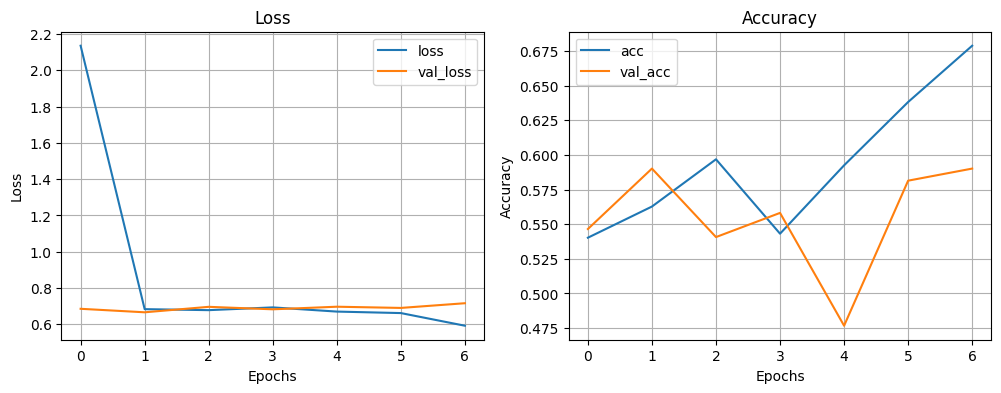

In [49]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Accuracy")

plot_metrics(metrics)

## Hyperparameter tuning

Testar olika värden för dropout och learning rate och plottar sedan dessa mot validation accuracy

In [53]:
def evaluate_model(**kwargs):
    early_stopper = EarlyStopping(
        monitor="val_loss", mode="min", patience=5, restore_best_weights=True
    )
    model = my_model(**kwargs)
    model.fit(
        x_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_data=(x_val, y_val)
    )

    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [54]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:58 4s/step - acc: 0.5312 - loss: 0.6916

W0000 00:00:1717527804.188913     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - acc: 0.5098 - loss: 4.9076

W0000 00:00:1717527810.626309     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527812.163093     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527812.782859     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - acc: 0.5098 - loss: 4.8444 - val_acc: 0.5552 - val_loss: 0.6894
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.5939 - loss: 0.6764 - val_acc: 0.5465 - val_loss: 0.7161
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6621 - loss: 0.6223 - val_acc: 0.5407 - val_loss: 0.7481
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.7208 - loss: 0.5404 - val_acc: 0.5494 - val_loss: 0.7503
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.8020 - loss: 0.4471 - val_acc: 0.5843 - val_loss: 0.9616
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.8770 - loss: 0.2877 - val_acc: 0.5727 - val_loss: 1.3050
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:58 4s/step - acc: 0.4688 - loss: 0.7468

W0000 00:00:1717527844.254707     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - acc: 0.4896 - loss: 4.3979

W0000 00:00:1717527850.855473     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527852.362885     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527852.983430     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - acc: 0.4901 - loss: 4.3415 - val_acc: 0.5727 - val_loss: 0.6870
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.5744 - loss: 0.6828 - val_acc: 0.5233 - val_loss: 0.6887
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6010 - loss: 0.6624 - val_acc: 0.6017 - val_loss: 0.6734
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6908 - loss: 0.6192 - val_acc: 0.5814 - val_loss: 0.7077
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7449 - loss: 0.5137 - val_acc: 0.5872 - val_loss: 0.7003
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7417 - loss: 0.5146 - val_acc: 0.5698 - val_loss: 1.0020
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.8634 - loss: 0.3317 - val_acc: 0.6163 - val_loss: 1.0435
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.9097 - loss: 0.2229 - val_acc: 0.5959 - val_loss: 1.0873
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3:17 5s/step - acc: 0.4688 -

W0000 00:00:1717527894.290174     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - acc: 0.4784 - loss: 4.7177

W0000 00:00:1717527900.828014     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527902.357597     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527902.974204     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - acc: 0.4787 - loss: 4.6559 - val_acc: 0.4855 - val_loss: 0.6861
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.5434 - loss: 0.6814 - val_acc: 0.5872 - val_loss: 0.6729
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.6047 - loss: 0.6599 - val_acc: 0.5959 - val_loss: 0.6369
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6651 - loss: 0.5988 - val_acc: 0.5988 - val_loss: 0.6791
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6849 - loss: 0.6780 - val_acc: 0.6483 - val_loss: 0.5992
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7146 - loss: 0.5504 - val_acc: 0.6890 - val_loss: 0.6187
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.7986 - loss: 0.4376 - val_acc: 0.7093 - val_loss: 0.5830
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.8405 - loss: 0.3483 - val_acc: 0.6948 - val_loss: 0.7407
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.8475 

W0000 00:00:1717527953.996647     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - acc: 0.5031 - loss: 7.7646

W0000 00:00:1717527960.479424     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527962.013386     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717527962.627204     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - acc: 0.5039 - loss: 7.6565 - val_acc: 0.5145 - val_loss: 0.8281
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.4933 - loss: 0.7163 - val_acc: 0.4971 - val_loss: 0.6913
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5363 - loss: 0.6877 - val_acc: 0.5959 - val_loss: 0.6862
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6480 - loss: 0.6630 - val_acc: 0.5581 - val_loss: 0.6843
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6492 - loss: 0.6199 - val_acc: 0.5872 - val_loss: 0.6883
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.7183 - loss: 0.5699 - val_acc: 0.6250 - val_loss: 0.7357
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.7571 - loss: 0.4879 - val_acc: 0.6541 - val_loss: 0.6600
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7856 - loss: 0.4405 - val_acc: 0.6541 - val_loss: 0.7089
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.8106 

W0000 00:00:1717528012.720103     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - acc: 0.5197 - loss: 5.7850

W0000 00:00:1717528018.891743     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528020.457696     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528021.067238     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 197ms/step - acc: 0.5197 - loss: 5.7103 - val_acc: 0.5116 - val_loss: 0.6922
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5228 - loss: 0.6906 - val_acc: 0.5407 - val_loss: 0.6814
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.5985 - loss: 0.6787 - val_acc: 0.5465 - val_loss: 0.6853
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6076 - loss: 0.6766 - val_acc: 0.5901 - val_loss: 0.6906
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6392 - loss: 0.6280 - val_acc: 0.5581 - val_loss: 0.7068
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.7084 - loss: 0.5889 - val_acc: 0.5378 - val_loss: 1.5931
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.6810 - loss: 0.6784 - val_acc: 0.6163 - val_loss: 0.7935


<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

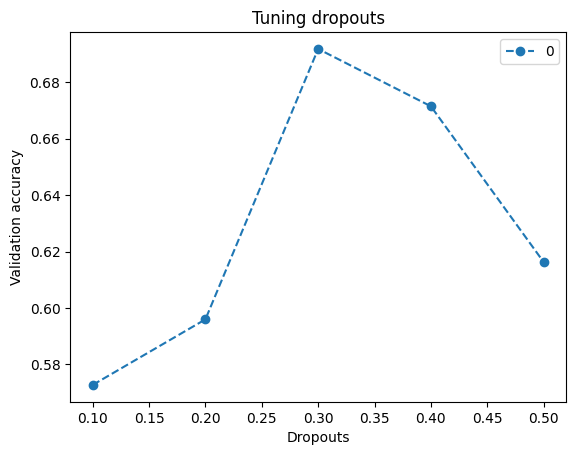

In [55]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)

In [57]:
learning_rate_accuracies = {}

for learning_rate in np.arange(.001,.01,.002):
    learning_rate = np.round(learning_rate,3)
    learning_rate_accuracies[learning_rate] = evaluate_model(learning_rate=learning_rate)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:48 4s/step - acc: 0.4688 - loss: 0.9914

W0000 00:00:1717528057.459784     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - acc: 0.4974 - loss: 4.9385

W0000 00:00:1717528063.674432     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528065.219211     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528065.870770     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 198ms/step - acc: 0.4976 - loss: 4.8735 - val_acc: 0.4855 - val_loss: 0.6941
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.4885 - loss: 0.6945 - val_acc: 0.6017 - val_loss: 0.6880
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5211 - loss: 0.6900 - val_acc: 0.4855 - val_loss: 0.6913
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.5398 - loss: 0.6878 - val_acc: 0.6076 - val_loss: 0.6802
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.5720 - loss: 0.6820 - val_acc: 0.5901 - val_loss: 0.6762
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5205 - loss: 0.6877 - val_acc: 0.5087 - val_loss: 0.7232
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.6022 - loss: 0.6595 - val_acc: 0.6076 - val_loss: 0.6742
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.6496 - loss: 0.6191 - val_acc: 0.6250 - val_loss: 0.6324
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.7151 

W0000 00:00:1717528116.621243     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.4888 - loss: 8.8317

W0000 00:00:1717528122.748795     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528124.280955     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528124.921233     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - acc: 0.4892 - loss: 8.7166 - val_acc: 0.5029 - val_loss: 0.6945
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5462 - loss: 0.6902 - val_acc: 0.5320 - val_loss: 0.7522
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5715 - loss: 0.6820 - val_acc: 0.4855 - val_loss: 2.5667
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.4982 - loss: 0.8647 - val_acc: 0.4855 - val_loss: 0.6990
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5345 - loss: 0.6913 - val_acc: 0.5291 - val_loss: 0.6854
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6188 - loss: 0.6569 - val_acc: 0.5116 - val_loss: 0.6921
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6449 - loss: 0.6323 - val_acc: 0.5581 - val_loss: 0.6994
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.6600 - loss: 0.6209 - val_acc: 0.6047 - val_loss: 0.7102
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - acc: 0.7327 

W0000 00:00:1717528174.433864     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.5189 - loss: 46.0122

W0000 00:00:1717528180.551728     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528182.087498     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528182.713388     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - acc: 0.5187 - loss: 45.3165 - val_acc: 0.4855 - val_loss: 0.6936
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - acc: 0.4944 - loss: 0.6932 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5192 - loss: 0.6932 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.4871 - loss: 0.6932 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5300 - loss: 0.6932 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.4880 - loss: 0.6933 - val_acc: 0.5145 - val_loss: 0.6930
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5143 - loss: 0.6930 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5145 - loss: 0.6929 - val_acc: 0.5145 - val_loss: 0.6928
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.505

W0000 00:00:1717528242.823735     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - acc: 0.4720 - loss: 177.6645

W0000 00:00:1717528248.955348     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528250.461866     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528251.084489     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - acc: 0.4722 - loss: 174.9290 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5002 - loss: 0.6933 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5018 - loss: 0.6932 - val_acc: 0.5145 - val_loss: 0.6928
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5198 - loss: 0.6927 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5065 - loss: 0.6931 - val_acc: 0.5145 - val_loss: 0.6930
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.4847 - loss: 0.6933 - val_acc: 0.4855 - val_loss: 0.6934
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.4907 - loss: 0.6933 - val_acc: 0.5145 - val_loss: 0.6931
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5146 - loss: 0.6932 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 1/10
 1/44 ━━━━━━━━━━━━━━━━━━━━ 2:48 4s/step - acc: 0.4688

W0000 00:00:1717528291.199842     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - acc: 0.4990 - loss: 139.4775

W0000 00:00:1717528297.279923     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528298.788944     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717528299.395446     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - acc: 0.4989 - loss: 137.3326 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - acc: 0.5105 - loss: 0.6931 - val_acc: 0.4855 - val_loss: 0.6932
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.4814 - loss: 0.6933 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - acc: 0.5159 - loss: 0.6930 - val_acc: 0.5145 - val_loss: 0.6928
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.4808 - loss: 0.6935 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.5113 - loss: 0.6931 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - acc: 0.4816 - loss: 0.6938 - val_acc: 0.5145 - val_loss: 0.6931
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - acc: 0.5073 - loss: 0.6932 - val_acc: 0.5145 - val_loss: 0.6929
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - acc: 0.527

<Axes: title={'center': 'Tuning learning rate'}, xlabel='Learning rate', ylabel='Validation accuracy'>

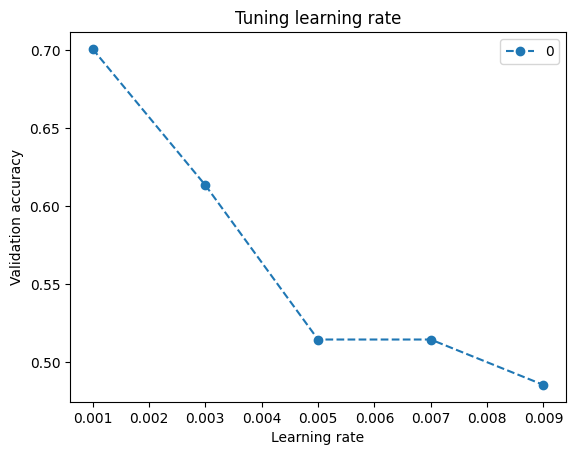

In [66]:
pd.DataFrame(learning_rate_accuracies.values(), index=learning_rate_accuracies.keys()).plot(
    title="Tuning learning rate", xlabel="Learning rate", ylabel="Validation accuracy", style = "--o"
)

### c)

In [50]:
model = my_model(dropout_rate=0.3, learning_rate=0.001)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 298, 348, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 149, 174, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 147, 172, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 73, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 71, 84, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 35, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 33, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40960)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    20,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,213,377 (80.92 MB)

 Trainable params: 21,213,377 (80.92 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5)

y_train = pruned_y_train
y_val = pruned_y_val

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= (x_val, y_val)
)

Epoch 1/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3:12 4s/step - acc: 0.4375 - loss: 0.8615

W0000 00:00:1717590451.960374     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - acc: 0.4868 - loss: 9.1899

W0000 00:00:1717590458.673674     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717590460.239913     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - acc: 0.4874 - loss: 9.0606 - val_acc: 0.4855 - val_loss: 1.3061
Epoch 2/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - acc: 0.4375 - loss: 1.3724

W0000 00:00:1717590460.863550     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5156 - loss: 0.8135 - val_acc: 0.5669 - val_loss: 0.6797
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.5742 - loss: 0.6808 - val_acc: 0.5174 - val_loss: 0.7230
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - acc: 0.6181 - loss: 0.6518 - val_acc: 0.5523 - val_loss: 0.6924
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.6803 - loss: 0.5796 - val_acc: 0.6657 - val_loss: 0.6473
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.7544 - loss: 0.4932 - val_acc: 0.7064 - val_loss: 0.6173
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.8010 - loss: 0.4297 - val_acc: 0.5930 - val_loss: 0.8483
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.7899 - loss: 0.4707 - val_acc: 0.6628 - val_loss: 0.7250
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - acc: 0.8642 - loss: 0.3112 - val_acc: 0.6773 - val_loss: 0.7504
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc:

### Evaluation

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_test = pruned_y_test
y_pred = model.predict(x_test)
y_pred[:5]

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 543ms/step


array([[0.96613723],
       [0.04809902],
       [0.01400726],
       [0.69821024],
       [0.4125771 ]], dtype=float32)

In [55]:
# y_pred > 0.5 to get binary result
print(classification_report(y_test, (y_pred > 0.5)))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       212
           1       0.68      0.66      0.67       200

    accuracy                           0.68       412
   macro avg       0.68      0.68      0.68       412
weighted avg       0.68      0.68      0.68       412



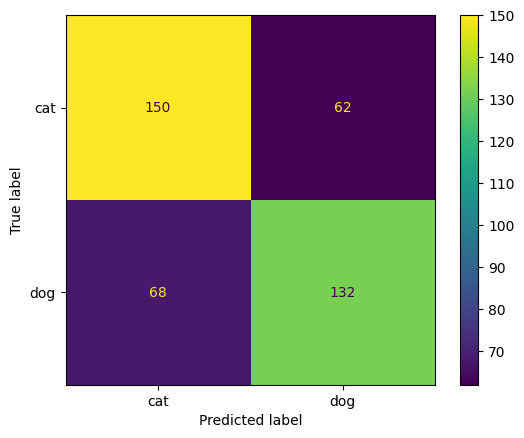

In [56]:
cm = confusion_matrix(y_test, (y_pred > 0.5),)
ConfusionMatrixDisplay(cm, display_labels=["cat", "dog"]).plot()

### d)

In [87]:
x_train[1].shape

(300, 350, 3)

In [57]:
from tensorflow.keras.applications import Xception


input_shape = 300, 350, 3

feature_extractor = Xception(
    weights="imagenet", include_top=False, input_shape=(input_shape)
)

feature_extractor.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 300, 350,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 149, 174,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 149, 174,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 149, 174,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 147, 172,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 147, 172,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 147, 172,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 147, 172,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 147, 172,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 147, 172,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 147, 172,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 147, 172,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 74, 86,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 74, 86,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 86,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 74, 86,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 74, 86,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [58]:
from tensorflow.keras.models import Sequential


model = Sequential(
    [
        feature_extractor,
        Flatten(),
        Dropout(0.3),
        Dense(512, activation="relu", kernel_initializer="he_normal"),
        Dense(1, activation="sigmoid"),
    ]
)

for layer in feature_extractor.layers:
    layer.trainable = False

model.compile(optimizer="adam", loss= "binary_crossentropy", metrics=["acc"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ ?                      │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [59]:
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=5)

y_train = pruned_y_train
y_val = pruned_y_val

model.fit(
    x_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_data= (x_val, y_val)
)

Epoch 1/100


2024-06-05 12:32:13.730697: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[32,128,147,172]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,172]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-05 12:32:13.877463: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.146966068s
Trying algorithm eng3{k11=2} for conv (f32[32,128,147,172]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,172]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking 

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - acc: 0.9330 - loss: 1.2165

W0000 00:00:1717590780.254744     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717590784.527918     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


44/44 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.9338 - loss: 1.2130 - val_acc: 0.9826 - val_loss: 1.1438
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 360ms/step - acc: 0.9929 - loss: 0.1910 - val_acc: 0.9913 - val_loss: 0.2680
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 353ms/step - acc: 0.9996 - loss: 0.0132 - val_acc: 0.9913 - val_loss: 0.4408
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 348ms/step - acc: 0.9956 - loss: 0.4776 - val_acc: 0.9855 - val_loss: 0.5574
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step - acc: 0.9966 - loss: 0.2051 - val_acc: 0.9942 - val_loss: 0.3530
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 349ms/step - acc: 0.9988 - loss: 0.0047 - val_acc: 0.9971 - val_loss: 0.2069
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 351ms/step - acc: 0.9991 - loss: 0.0096 - val_acc: 0.9884 - val_loss: 0.4111
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - acc: 0.9965 - loss: 0.0992 - val_acc: 0.9913 - val_loss: 0.3361
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step -

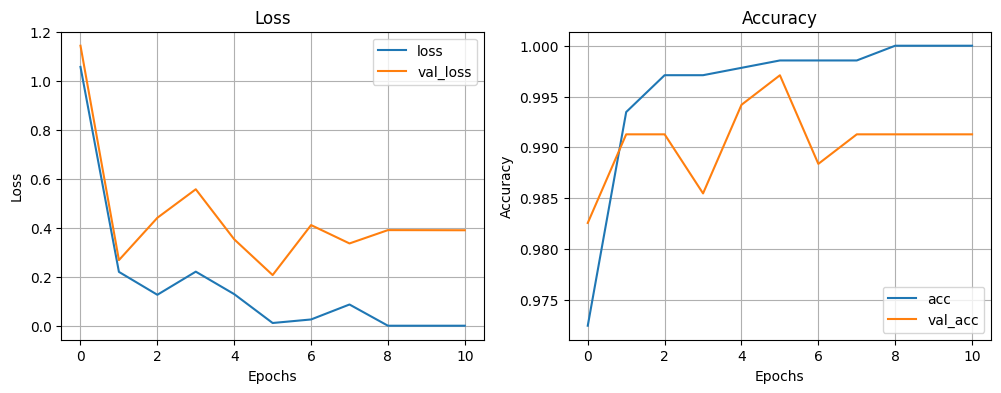

In [60]:
metrics= pd.DataFrame(model.history.history)
plot_metrics(metrics)

### Evaluation

In [61]:
y_test = pruned_y_test
y_pred = model.predict(x_test)
y_pred[:5]

12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

2024-06-05 12:40:03.903497: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[28,128,147,172]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,128,147,172]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-05 12:40:03.919348: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.015977559s
Trying algorithm eng3{k11=2} for conv (f32[28,128,147,172]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,128,147,172]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking 

13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step 


array([[1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [62]:
print(classification_report(y_test, (y_pred > 0.5)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       212
           1       0.98      0.98      0.98       200

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



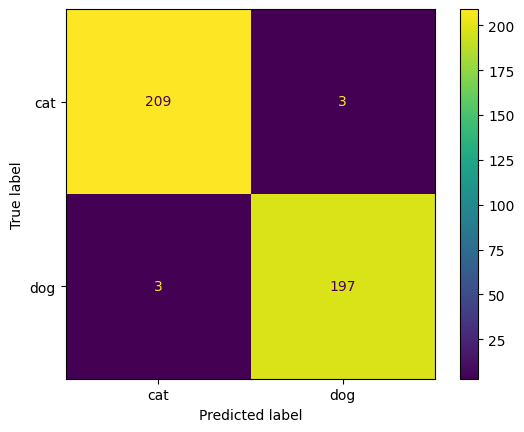

In [63]:
cm = confusion_matrix(y_test, (y_pred > 0.5),)
ConfusionMatrixDisplay(cm, display_labels=["cat", "dog"]).plot()

### Vad är transfer learning?

Transfer learning är när tar användning av en redan existerande modell som har tränats för ett visst ändamål till ett nytt men liknande sådant. Detta är användbart bland annat när man har begränsat med data då man kan använda en modell som redan tränat på en enormt mycket större mängd liknande data och använda denna som grund. Den förtränade modellens lager och vikter kan då användas till att exempelvis identifiera former, kanter m.m som i sin kan hjälpa till med saker som att att skilja mellan en katt och en hund i fallet av bildklassificering.